In [1]:
include("../src/Conduction.jl");
using Plots, LaTeXStrings, QuadGK;

semiconductor = Conduction.Semiconductor(
4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
0.1 * 1.6e-19, # Mode effect of the phonons (J)
3e21, # intrinsic semiconductor's density (cm^-3)
0, # Doping states' density (cm^-3)
0.1 * 1.6e-19, # Energy to a vacant target site (J)
1e13, # Base electron jump rate
-0.7, # Fermi level (eV)
0.071, # Intrinsic semiconductor's gaussian width (eV)
0.07, # Doping states' gaussian width (eV)
);
F = -5.3e4;
T = [50i for i in 1:8];

In [2]:

res_d = (x -> Conduction.overallDiffusion(semiconductor, x, F, 15)).(T);

In [3]:
res_mobi = (x -> Conduction.overallMobility(semiconductor, x, F, 15)).(T);

In [4]:
res_ein = (x -> Conduction.overallEin(semiconductor, x, F, 15)).(T);

In [7]:
res_cond = (T -> (quadgk(
    x -> Conduction.q * Conduction.DOS(semiconductor, x, T) * Conduction.F(semiconductor, x, T) * Conduction.electronMobility(semiconductor, x, T, F) * Conduction.k * T,
    -15,
    15,
    rtol=1e-2
)[1])).(T);

8-element Array{Float64,1}:
 2.5391168442911674e-60
 9.010826447973468e-32
 3.051036001062084e-22
 2.6055243590397592e-17
 2.8131530464974994e-14
 3.2091240538015584e-12
 9.854551624534167e-11
 1.3138795416110987e-9

In [12]:
T_2 = [20i for i in 15:20];
res_d_2 = (x -> Conduction.overallDiffusion(semiconductor, x, F, 15)).(T_2);

In [13]:
res_mobi_2 = (x -> Conduction.overallMobility(semiconductor, x, F, 15)).(T_2);

In [14]:
res_ein_2 = (x -> Conduction.overallEin(semiconductor, x, F, 15)).(T_2);

In [15]:
res_cond_2 = (T -> (quadgk(
    x -> Conduction.q * Conduction.DOS(semiconductor, x, T) * Conduction.F(semiconductor, x, T) * Conduction.electronMobility(semiconductor, x, T, F) * Conduction.k * T,
    -15,
    15,
    rtol=1e-2
)[1])).(T_2);

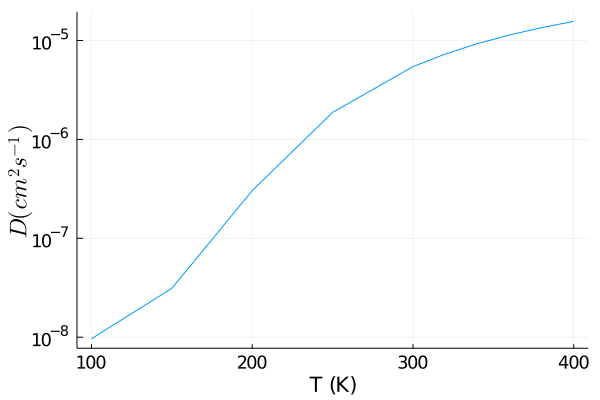

In [31]:
plot(vcat(T[2:end-2], T_2[2:end]), vcat(res_d[2:end-2], res_d_2[2:end]), yaxis=:log, xlabel="T (K)", ylabel=L"D(cm^2 s^{-1})", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

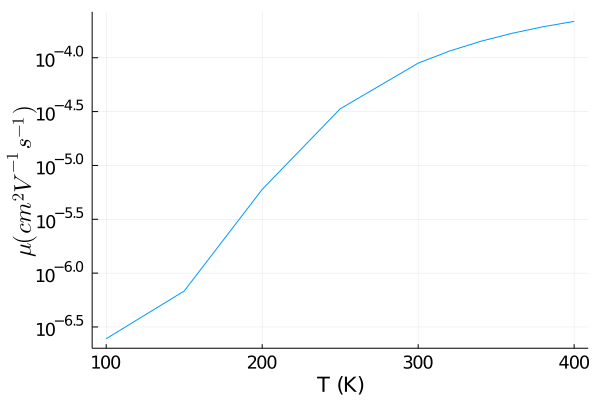

In [33]:
plot(vcat(T[2:end-2], T_2[2:end]), vcat(res_mobi[2:end-2], res_mobi_2[2:end]), yaxis=:log, xlabel="T (K)", ylabel=L"\mu(cm^2 V^{-1} s^{-1})", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

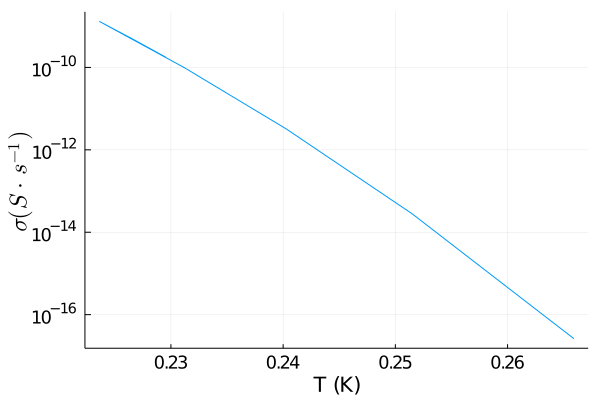

In [41]:
plot(vcat(T[4:end].^(-1/4), T_2[4:end].^(-1/4)), vcat(res_cond[4:end], res_cond_2[4:end]), yaxis=:log,  xlabel="T (K)", ylabel=L"\sigma (S \cdot s^{-1})", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

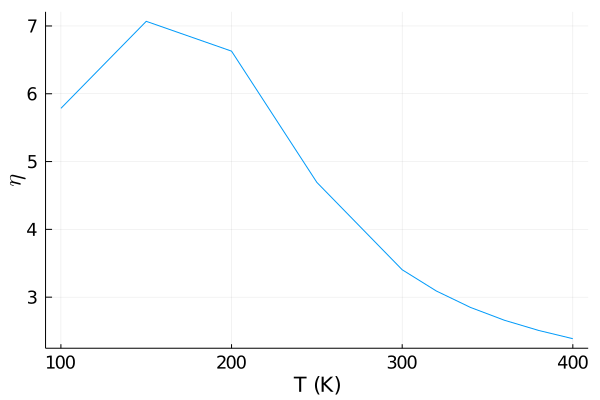

In [38]:
plot(vcat(T[2:end-2], T_2[2:end]), vcat(res_ein[2:end-2], res_ein_2[2:end]) ./ (Conduction.k * vcat(T[2:end-2], T_2[2:end]) / Conduction.q ), xlabel="T (K)", ylabel=L"\eta", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)